# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>

The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on <span style="color:red">two variational parameters: $\sigma$ and $\mu$</span>.

### Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
<span style="color:red">Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

<span style="color:red">Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm</span>

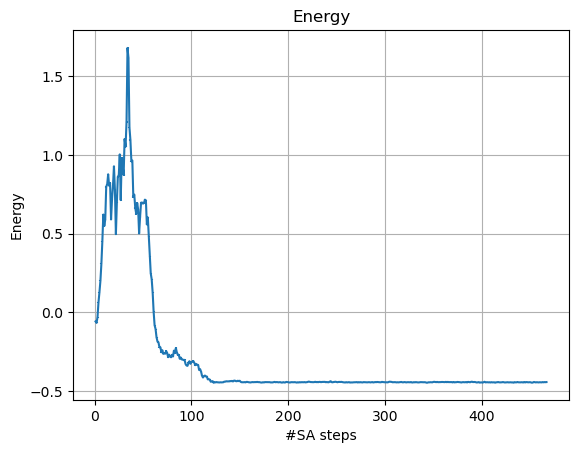

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

energy_SA_data= np.loadtxt('output_Energy_SA.dat')
energy_SA = energy_SA_data[:, 0]
energy_err_SA = energy_SA_data[:,1]

x = np.arange(1, len(energy_SA)+1)
# Plot for Potential Energy
plt.errorbar(x, energy_SA, yerr=energy_err_SA)
plt.xlabel('#SA steps')
plt.ylabel('Energy')
plt.title('Energy')
plt.grid(True)
plt.show()

Show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps

Best mu: 0.809723
Best sigma: 0.62129


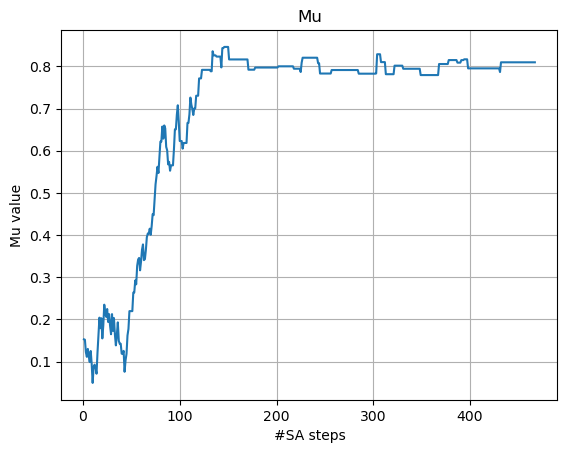

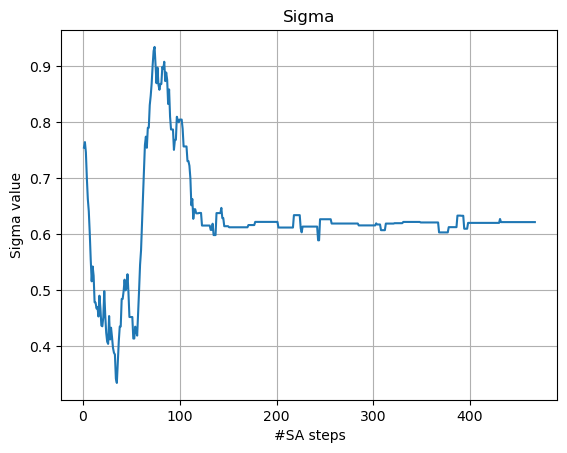

In [2]:
parameters_SA_data= np.loadtxt('output_Parameters_SA.dat')
mu_SA = parameters_SA_data[:, 0]
sigma_SA = parameters_SA_data[:,1]

x = np.arange(1, len(mu_SA)+1)

# Print best values of mu, sigma
best_mu = mu_SA[-1]
best_sigma = sigma_SA[-1]
print("Best mu:", best_mu)
print("Best sigma:", best_sigma)

# Plot mu
plt.plot(x, mu_SA)
plt.xlabel('#SA steps')
plt.ylabel('Mu value')
plt.title('Mu')
plt.grid(True)
plt.show()

# Plot sigma
plt.plot(x, sigma_SA)
plt.xlabel('#SA steps')
plt.ylabel('Sigma value')
plt.title('Sigma')
plt.grid(True)
plt.show()

<span style="color:red">Show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps <span style="color:red">for the set of parameters which minimize $\langle {\hat H} \rangle_T$</span>

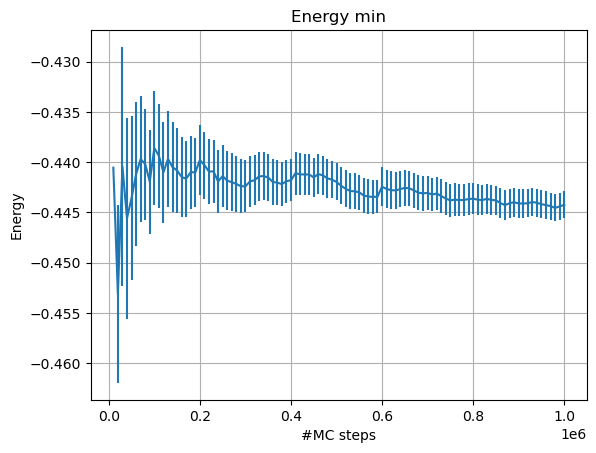

In [3]:
energy_min_data = np.loadtxt('output_metro.dat')
energy_min = energy_min_data[:, 2]
energy_min_err = energy_min_data[:,3]

M = 10000   # Number of throws in each block
N = 100     # Number of blocks

x = np.arange(1, len(energy_min)+1) * M
# Plot for Potential Energy
plt.errorbar(x, energy_min, yerr=energy_min_err)
plt.xlabel('#MC steps')
plt.ylabel('Energy')
plt.title('Energy min')
plt.grid(True)
plt.show()

<span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation.

Numerical ground state energy:  -0.4607429006554594


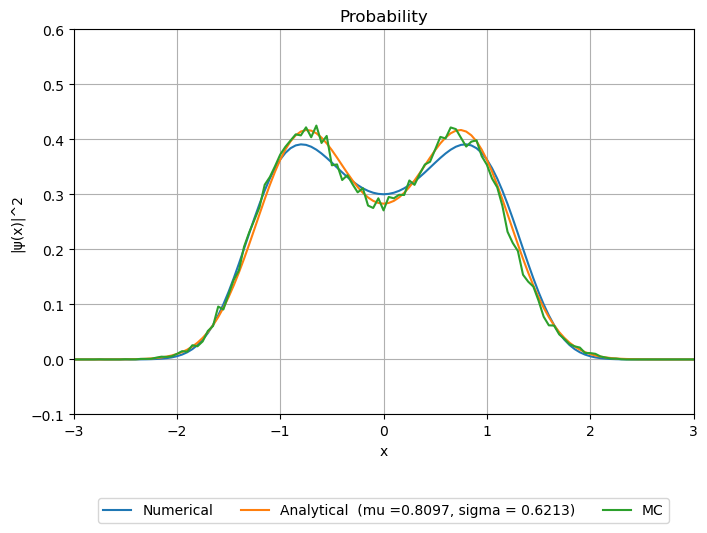

In [4]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2
    
def Psi2(x):
    return (np.exp(-(x-best_mu)**2/(2.0 * best_sigma**2)) + np.exp(-(x+best_mu)**2/(2.0 * best_sigma**2)))**2

hbar = 1
m = 1
a = 6
N = 121 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

#normalize Analytical
psi2min = Psi2(x)
psi2min = psi2min / (a*np.mean(psi2min))

#Load histo
data = np.loadtxt('Psi2_Histogram.dat')
psi2MC = data[:, 1]

print("Numerical ground state energy: ", E[0])

# Plot a few things
plt.figure(figsize=(8,5))
plt.plot(x, (psi[0]**2), label = 'Numerical')
plt.plot(x, psi2min, label = 'Analytical  (mu =' + "{:.4f}".format(best_mu) +', sigma = ' +"{:.4f}".format(best_sigma)+')')
plt.plot(x, psi2MC, label = 'MC')
plt.title("Probability")
plt.xlabel("x")
plt.ylabel("|ψ(x)|^2")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.1, 0.6))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.show()